In [2]:
!pip install --upgrade pip
!pip install seaborn --upgrade
import seaborn as sns
print(sns.__version__)

     |████████████████████████████████| 1.5 MB 413 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.1
    Uninstalling pip-20.3.1:
      Successfully uninstalled pip-20.3.1
     |████████████████████████████████| 285 kB 420 kB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
0.11.1


# Table of contents:
1. [Loading data and libraries](#1)<br>
1.1 [Importing modules](#1.1)<br>
1.2 [Importing Data](#1.2)
2. [Preprocessing](#2)<br>
2.1 [Data exploration](#2.1)<br>
2.2 [Data cleaning](#2.2)<br>
2.3 [Market Overview](#2.3)<br>
3. [Price](#3) <br>
3.1 [Most expensive neighbourhood groups](#3.1)<br>
3.2 [Most expensive neighbourhood](#3.2)<br>
3.3 [Most expensive room types](#3.3)<br>
3.3 [Best place to stay within a certain price range](#3.3)
4. [Reviews](#4) <br>

# 1. Loading data and libraries <a class="anchor" id="1"></a>

## 1.1 Importing Modules <a class="anchor" id="1.1"></a>

In [3]:
# data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# maps
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## 1.2 Importing Data <a class="anchor" id="1.2"></a>

In [4]:
df = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
ny_map = plt.imread('../input/new-york-city-airbnb-open-data/New_York_City_.png', 0)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Preprocessing <a class="anchor" id="2"></a>

## 2.1 Data Exploration <a class="anchor" id="2.1"></a>

In [6]:
print(f'There are {df.shape[1]} columns and {df.shape[0]} rows total in a dataset')

There are 16 columns and 48895 rows total in a dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see, that we missing some of the information about hosts and reviews. We can decide later what we are going to do aabout that.

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Some of the prices are set to 0. Which doesnt make any sense. Unfortunately we cannot assume price. So we will remove it. Also there are suspiciously large difference between 3rd and 4th quartiles, which need to be explored further.

In [9]:
print(f'{len(df[df.price == 0])} rows were removes')
print(f"Difference between 3rd and 4th quartiles: {df.price.describe()['max'] - df.price.describe()['75%']}")
df = df[df.price > 0]

11 rows were removes
Difference between 3rd and 4th quartiles: 9825.0


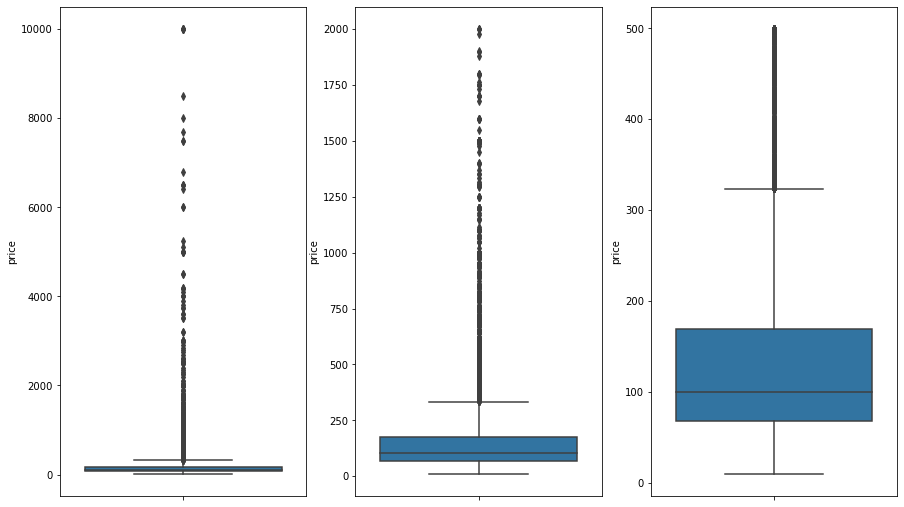

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(15,9))
sns.boxplot(y='price', ax=axs[0], data=df)
sns.boxplot(y='price', ax=axs[1], data=df[df.price < 2000])
sns.boxplot(y='price', ax=axs[2], data=df[df.price < 500])

Unfortunately we need to cut luxury appartemnts out of the study. They skewing data a lot and will be impacting our future study. Just in case we will need them. We gonna store them into separate data frame.

## 2.2 Data Cleaning <a class="anchor" id="2.2"></a>

In [11]:
df_lux = df[df.price > 500]
print(f'{len(df_lux)} rows were removes')
df = df[df.price <= 500]

1044 rows were removes


remove columns: last review date, availavility, host name

## 2.3 Market overview <a class="anchor" id="2.3"></a>

TODO


# 3. Price <a class="anchor" id="3"></a>

In [12]:
print(f'Our average price now is {round(df.price.mean())} down from 153 calculated before.')

Our average price now is 132 down from 153 calculated before.


Lets start analysis by looking at the prie column in more details.

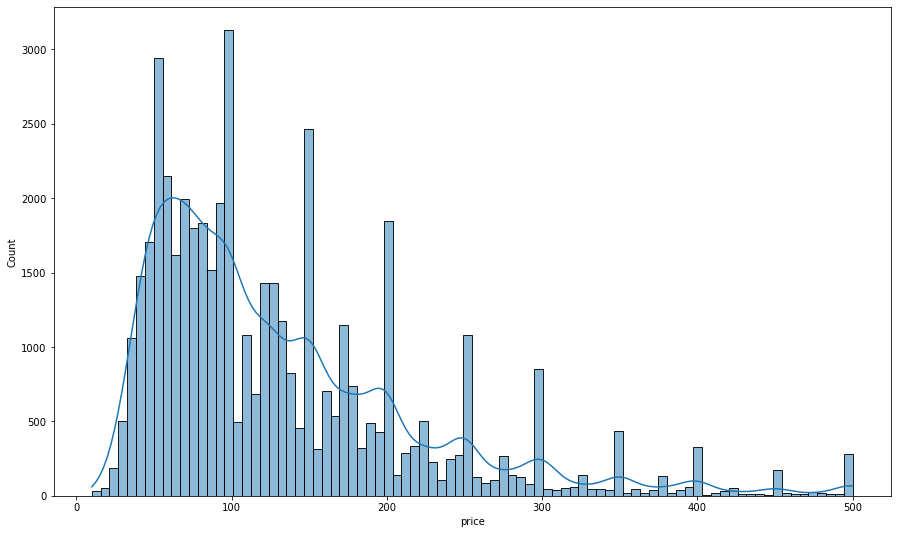

In [13]:
plt.figure(figsize=(15, 9))
sns.histplot(df.price, kde=True)

Positively skewed price distribution. Most of the lisitngs are in range 0 - 200

## 3.1 Most expensive neighbourhood groups <a class="anchor" id="3.1"></a>

In [14]:
# DataFrame grouped by neighbourhoods
# df_ng = df.groupby('neighbourhood_group').agg(
#                 count=('price', 'count'),
#                 min_price=('price', 'min'),
#                 max_price=('price', 'max'),
#                 avg_price=('price', 'mean')).sort_values(by='avg_price', ascending=False).reset_index()

# DataFrame grouped by neighbourhoods
df_ng = df.groupby('neighbourhood_group').agg(
                count=('price', 'count'),
                min_price=('price', 'min'),
                max_price=('price', 'max'),
                avg_price=('price', 'mean'),
                min_rev=('number_of_reviews', 'min'),
                max_rev=('number_of_reviews', 'max'),
                avg_rev=('number_of_reviews', 'mean'),
                min_rpm=('reviews_per_month', 'min'),
                max_rpm=('reviews_per_month', 'max'),
                avg_rpm=('reviews_per_month', 'mean')).sort_values(by='avg_price', ascending=False).reset_index()

In [15]:
df_ng

,neighbourhood_group,count,min_price,max_price,avg_price,min_rev,max_rev,avg_rev,min_rpm,max_rpm,avg_rpm
0,Manhattan,20887,10,500,163.255805,0,607,21.361756,0.01,58.50,1.274643
1,Brooklyn,19866,10,500,112.679251,0,488,24.341740,0.01,14.00,1.285865
2,Queens,5637,10,500,92.850807,0,629,27.806103,0.01,20.94,1.944955
3,Staten Island,367,13,450,91.144414,0,333,31.444142,0.02,10.12,1.878498
4,Bronx,1083,10,500,81.818098,0,321,26.143121,0.02,10.34,1.840779


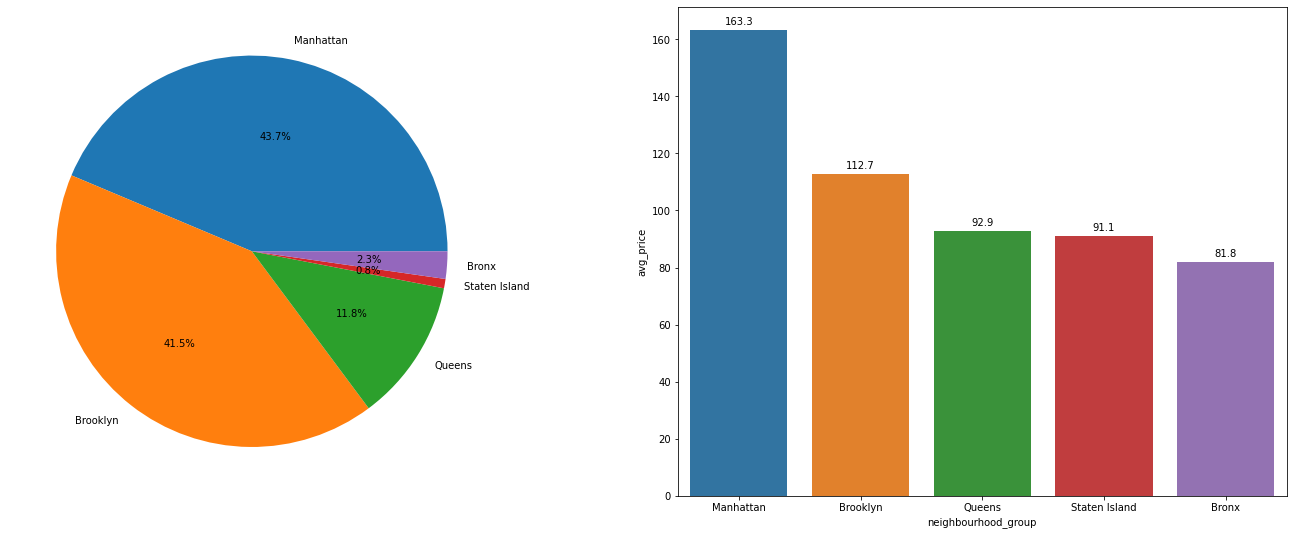

In [16]:
fig, (a1, a2) =plt.subplots(ncols=2, figsize=(24,9))
a1.pie(df_ng['count'], labels=df_ng.neighbourhood_group, autopct='%1.1f%%')
bp = sns.barplot(ax=a2, x=df_ng.neighbourhood_group, y=df_ng.avg_price)

for idx, row in df_ng.iterrows():
    bp.text(idx, row.avg_price + 2, round(row.avg_price, 1), ha='center')

Manhattan is taking biggest slice of NY city for airbnb renting and it is also has highest average price per room. Manhattan and Brooklyn together takes 85% of the market. Meanwhile Bronx has lowest average cost.

## 3.2 Most expensive neighbourhood <a class="anchor" id="3.2"></a>

In [85]:
df_nh = df.groupby('neighbourhood').agg(
                count=('price', 'count'),
                avg_price=('price', 'mean')).sort_values(by='count', ascending=False).reset_index()
df_nh_price = df.groupby('neighbourhood').agg(
                count=('price', 'count'),
                avg_price=('price', 'mean')).sort_values(by='avg_price', ascending=False).reset_index()

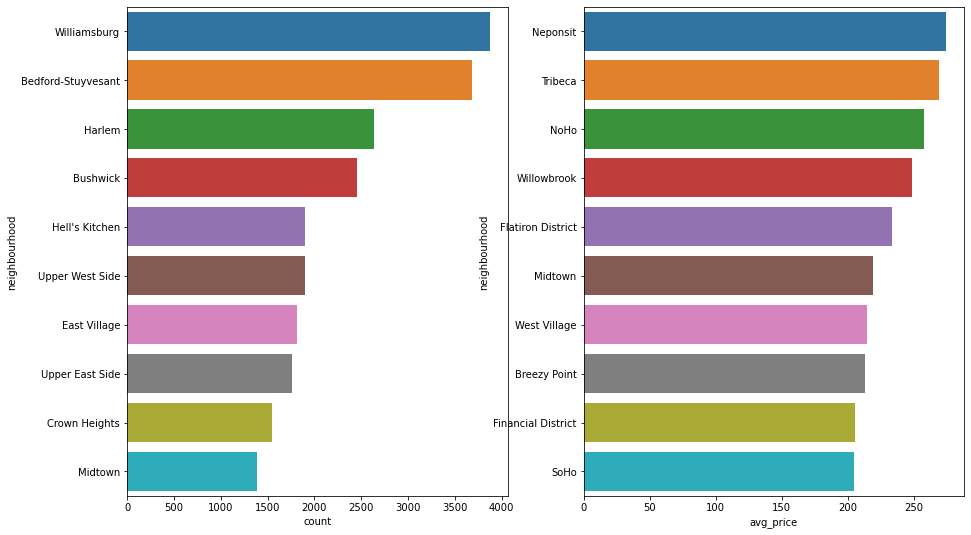

In [86]:
fig, (a1, a2) = plt.subplots(ncols=2, figsize=(15,9))
m1 = sns.barplot(x='count', y='neighbourhood', ax=a1,  data=df_nh[:10])
m2 = sns.barplot(x='avg_price', y='neighbourhood', ax=a2,  data=df_nh_price[:10])

## 3.3 Most expensive room type <a class="anchor" id="3.3"></a>

In [17]:
df_rt = df.groupby('room_type').agg(
                count=('price', 'count'),
                avg_price=('price', 'mean')).sort_values(by='avg_price', ascending=False).reset_index()

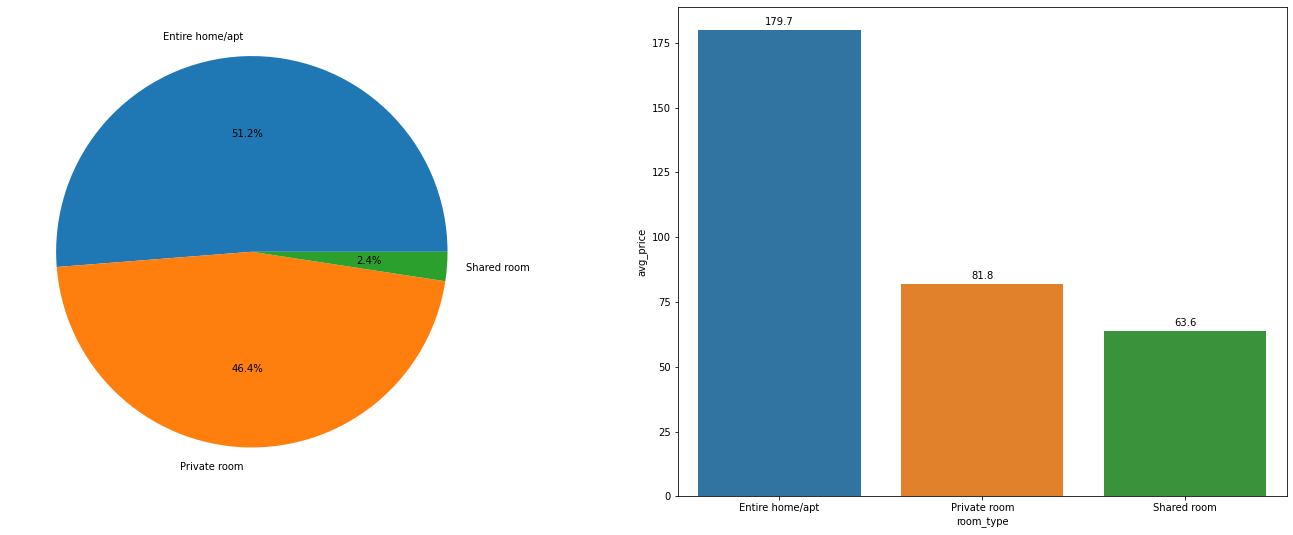

In [18]:
fig, (a1, a2) =plt.subplots(ncols=2, figsize=(24,9))
a1.pie(df_rt['count'], labels=df_rt.room_type, autopct='%1.1f%%')
bp = sns.barplot(ax=a2, x=df_rt.room_type, y=df_rt.avg_price)

for idx, row in df_rt.iterrows():
    bp.text(idx, row.avg_price + 2, round(row.avg_price, 1), ha='center')

97% of listing are either entire home/apartment or private room. Entire home is the most expensive option, on average it is twice more expensive than rernting a room, or almost 3 times more expnsive than renting a shared room. 

In [19]:
df_ng_rt = df.groupby(['neighbourhood_group', 'room_type']).agg(
                count=('price', 'count'),
                avg_price=('price', 'mean')).sort_values(by='avg_price', ascending=False).reset_index()

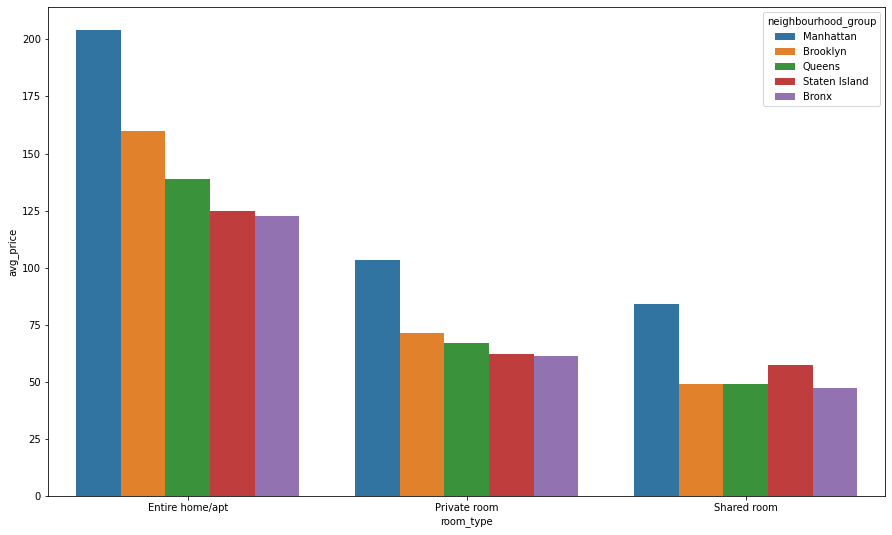

In [20]:
plt.figure(figsize=(15, 9))
sns.barplot(x=df_ng_rt.room_type, y=df_ng_rt.avg_price, hue=df_ng_rt.neighbourhood_group)

Manhattan is "dominating" pricewise. surprisingly there are not such a big difference between share room and private room pries.

## 3.4 Best place to stay within price range <a class="anchor" id="3.4"></a>

pandas does provide a nice feature "describe". It is providing quartile ranges. Lets look at them in more details.

In [38]:
price_range = df.price.describe()[3:8]
def price_range_f(x):
    if x < price_range[1]:
        return 1
    elif x < price_range[2] and x >= price_range[1]:
        return 2
    elif x < price_range[3] and x >= price_range[2]:
        return 3
    else:
        return 4

In [49]:
df_tmp = df.copy()
df_tmp['q'] = df_tmp.price.apply(lambda x: price_range_f(x))
df_tmp_grouped = df_tmp.groupby(['q', 'neighbourhood_group']).agg(
                                    count=('price', 'count'))
df_tmp_grouped

,q,neighbourhood_group,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Bronx,556,556,556,556,556,556,556,556,556,556,556,471,471,556,556
1,1,Brooklyn,6334,6332,6334,6330,6334,6334,6334,6334,6334,6334,6334,5057,5057,6334,6334
2,1,Manhattan,2320,2318,2320,2319,2320,2320,2320,2320,2320,2320,2320,1826,1826,2320,2320
3,1,Queens,2463,2463,2463,2461,2463,2463,2463,2463,2463,2463,2463,2038,2038,2463,2463
4,1,Staten Island,155,155,155,155,155,155,155,155,155,155,155,134,134,155,155
5,2,Bronx,308,308,308,307,308,308,308,308,308,308,308,241,241,308,308
6,2,Brooklyn,5428,5426,5428,5425,5428,5428,5428,5428,5428,5428,5428,4464,4464,5428,5428
7,2,Manhattan,4600,4599,4600,4599,4600,4600,4600,4600,4600,4600,4600,3735,3735,4600,4600
8,2,Queens,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1325,1325,1638,1638
9,2,Staten Island,115,115,115,115,115,115,115,115,115,115,115,98,98,115,115


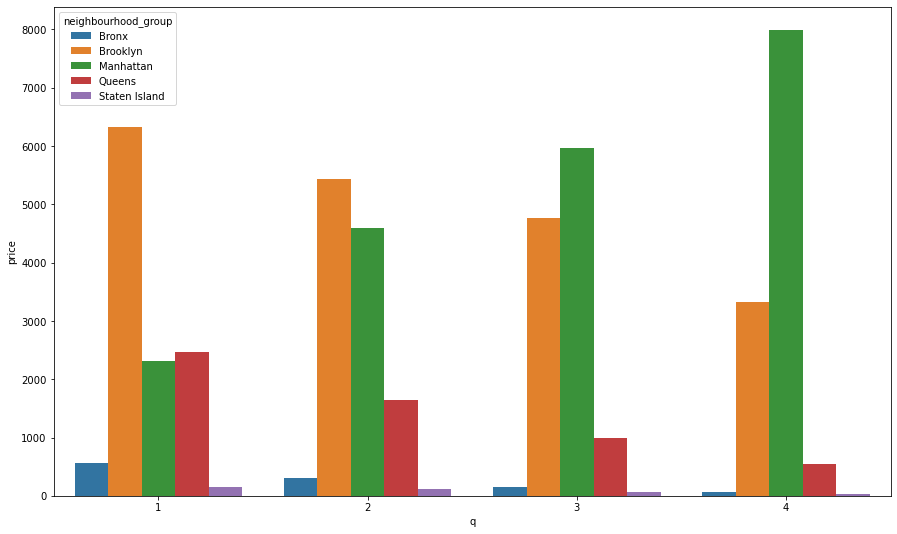

In [52]:
plt.figure(figsize=(15, 9))
sns.barplot(x='q', y='price', hue='neighbourhood_group', data=df_tmp_grouped)

# 4. Reviews <a class="anchor" id="4"></a>

Reviews per month can be nicely used to discover how often this specific place been rent out recently, we will use that. I think it is a bit pointless to simply list 10 apartemtns with highest number of reviews, but can we go one step further and maybe find 

# Top rated area

In [87]:
df[df.host_id == 2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


# Top rated room type

# What rooms are being rented more often

# Conclusions